## Environment Prep

### import modules

In [1]:
import scanpy as sc
import seaborn as sns
from matplotlib import pyplot as plt
import muon as mu
import os

/home/ceger/miniforge3/envs/multiome_QC-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### set default paths

In [2]:
output_path = os.path.join(os.getcwd(), '.data/output/')
os.listdir(output_path)

['E-MTAB12916_E-MTAB12919-QC-Norm.h5mu', 'E-MTAB12916_E-MTAB12919-QC.h5mu']

### helper functions

## Read h5mu into mdata object

In [3]:
mdata = mu.read_h5mu(os.path.join(output_path, 'E-MTAB12916_E-MTAB12919-QC.h5mu'))
mdata

/home/ceger/miniforge3/envs/multiome_QC-env/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/ceger/miniforge3/envs/multiome_QC-env/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 213373 × 3775615
  var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
  2 modalities
    rna:	213373 x 70711
      obs:	'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'doublet_score', 'predicted_doublet'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
      uns:	'scrublet'
    atac:	213373 x 3704904
      obs:	'sample', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'atac', 'files'

## Normalization

### rna

In [4]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 213373 × 70711
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'

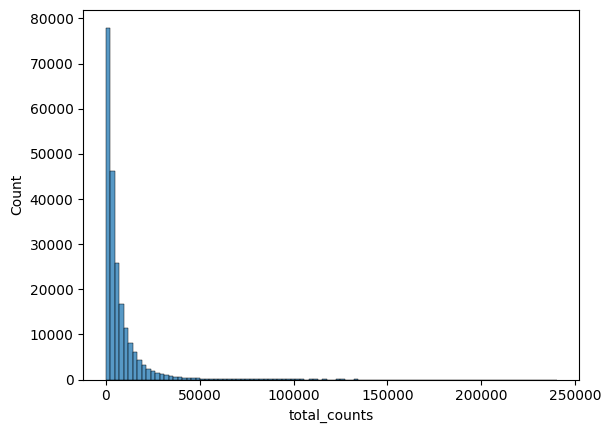

In [5]:
p1 = sns.histplot(rna.obs["total_counts"], bins=100, kde=False)

In [6]:
scales_counts = sc.pp.normalize_total(rna, target_sum=None, inplace=False)
# log1p transform
rna.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

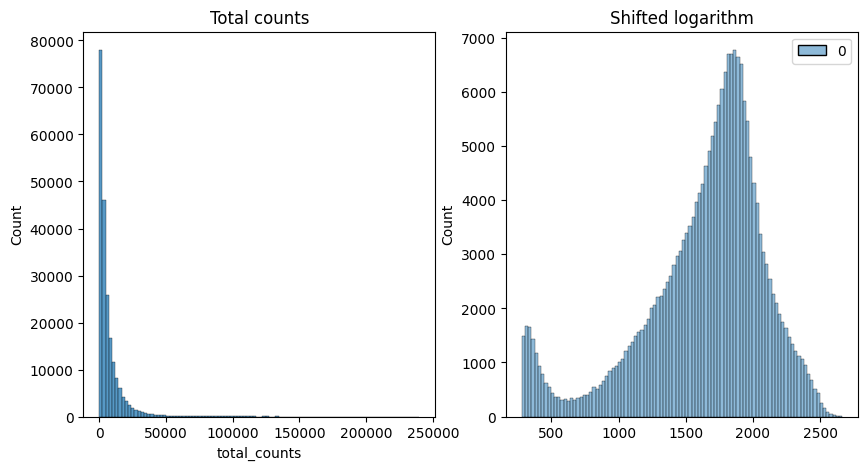

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(rna.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(rna.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [8]:
rna

AnnData object with n_obs × n_vars = 213373 × 70711
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'
    layers: 'log1p_norm'

### atac

In [9]:
atac = mdata.mod['atac']
atac

AnnData object with n_obs × n_vars = 213373 × 3704904
    obs: 'sample', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'

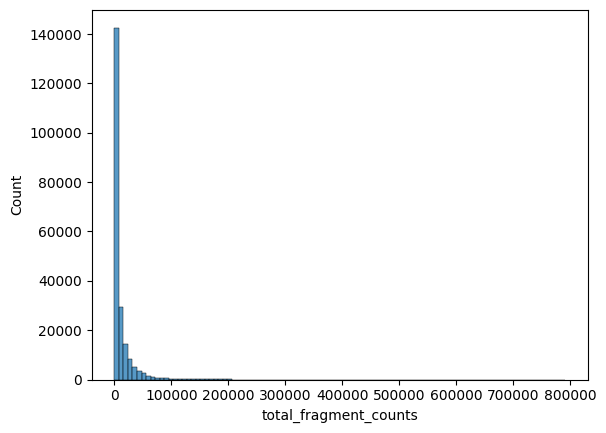

In [10]:
p1 = sns.histplot(atac.obs["total_fragment_counts"], bins=100, kde=False)

In [11]:
rna.obs['total_counts']

AAACATGCAGCAGGTA-1       1263.0
AAACATGCATAGCTGC-1       7200.0
AAACCAACAAGGTGCA-1       1009.0
AAACCAACACTTAACG-1      18907.0
AAACCAACAGCCGCTA-1       7303.0
                         ...   
TTTGTGTTCTACTAAG-1       6778.0
TTTGTTGGTAAATTGC-1-1     1959.0
TTTGTTGGTAGCAGCT-1        390.0
TTTGTTGGTCATTAGG-1      10603.0
TTTGTTGGTTTGAGCA-1        264.0
Name: total_counts, Length: 213373, dtype: float32

<Axes: >

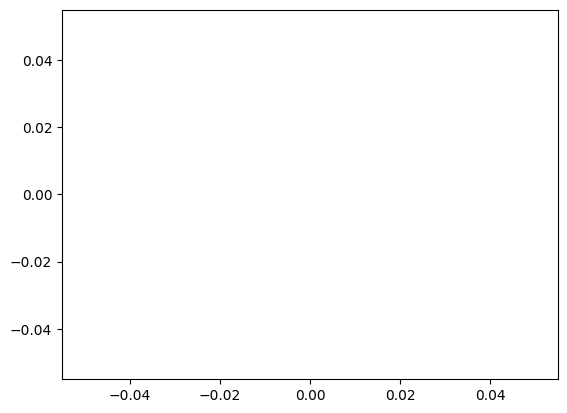

In [12]:
sns.histplot()

<Axes: ylabel='Frequency'>

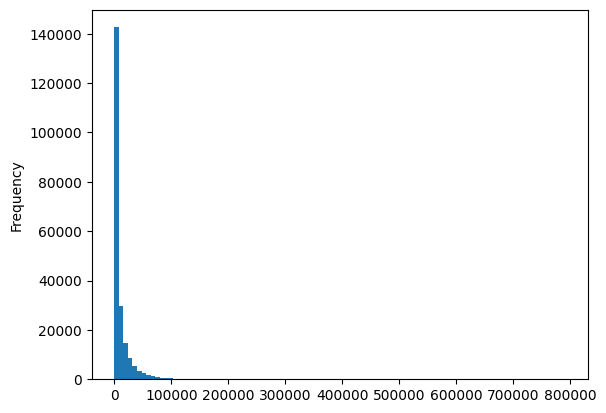

In [13]:
atac.obs['total_fragment_counts'].plot(kind='hist', bins=100)

In [14]:
scales_counts = sc.pp.normalize_total(atac, target_sum=None, inplace=False)
# log1p transform
atac.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

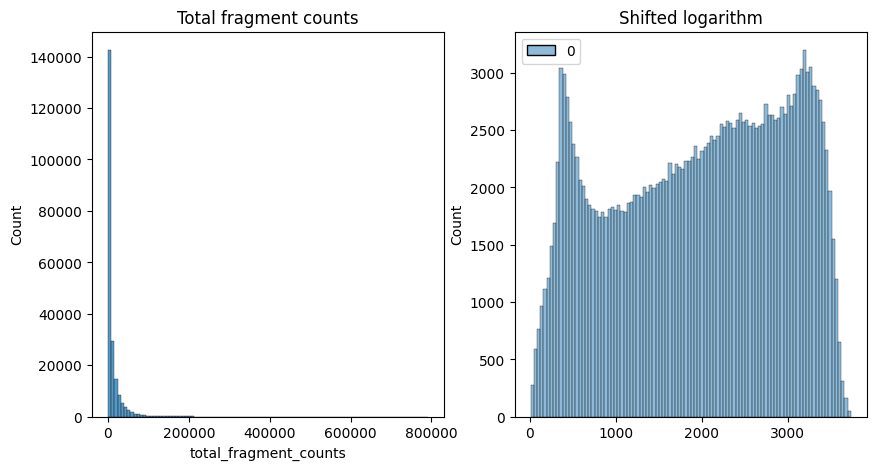

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(atac.obs["total_fragment_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total fragment counts")
p2 = sns.histplot(atac.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [16]:
atac

AnnData object with n_obs × n_vars = 213373 × 3704904
    obs: 'sample', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'
    layers: 'log1p_norm'

In [17]:
mdata = mu.MuData(
    {
        'rna': rna,
        'atac': atac,
    }
)
mdata

MuData object with n_obs × n_vars = 213373 × 3775615
  var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
  2 modalities
    rna:	213373 x 70711
      obs:	'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'doublet_score', 'predicted_doublet'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
      uns:	'scrublet'
      layers:	'log1p_norm'
    atac:	213373 x 3704904
      obs:	'sample', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'atac', 'files'
      layers:	'log1p_norm'

In [18]:
mdata_output_path = os.path.join(output_path, 'E-MTAB12916_E-MTAB12919-QC-Norm.h5mu')
mdata.write_h5mu(mdata_output_path)

os.listdir(output_path)

/home/ceger/miniforge3/envs/multiome_QC-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/ceger/miniforge3/envs/multiome_QC-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


['E-MTAB12916_E-MTAB12919-QC-Norm.h5mu', 'E-MTAB12916_E-MTAB12919-QC.h5mu']